## Quicksort tornillos y tuercas

Nos dan una fila de $n$ tuercas y otra de los $n$ tornillos que les corresponden, pero en cualquier orden. Visualmente no podemos comparar dos tuercas o dos tornillos, pero sí podemos probar una tuerca con un tornillo y decidir cuál es mayor que la otra, o si corresponden.

A continuación, se presenta una implementación del algoritmo de quicksort para ordenar las tuercas y los tornillos.

1. Primero, se define una clase para representar las tuercas y los tornillos. Se implementan los métodos `__lt__` y `__gt__` para comparar las tuercas y los tornillos con el operador `<` y `>` respectivamente: Se puede comparar una tuerca con un tornillo, pero no una tuerca con otra tuerca o un tornillo con otro tornillo.

In [1]:
from dataclasses import dataclass

@dataclass
class Tornillo:
    size: int

    def __lt__(self, other) -> bool:
        if not isinstance(other, Tuerca):
            raise ValueError("Comparación con un objeto no Tuerca")
        return self.size < other.size

    def __gt__(self, other) -> bool:
        if not isinstance(other, Tuerca):
            raise ValueError("Comparación con un objeto no Tuerca")
        return self.size > other.size


@dataclass
class Tuerca:
    size: int

    def __lt__(self, other) -> bool:
        if not isinstance(other, Tornillo):
            raise ValueError("Comparación con un objeto no Tornillo")
        return self.size < other.size

    def __gt__(self, other) -> bool:
        if not isinstance(other, Tornillo):
            raise ValueError("Comparación con un objeto no Tornillo")
        return self.size > other.size

A continuación podemos ver algunas comparaciones entre tuercas y tornillos:

In [2]:
Pieza = Tornillo | Tuerca

def print_comp(a: Pieza, b: Pieza):
    try:
        print(f"{a} > {b} <=> {a > b}")
    except ValueError as e:
        print(f"{a} > {b} <=> {e}")

print_comp(Tuerca(1), Tornillo(2))
print_comp(Tornillo(3), Tuerca(2))
print_comp(Tuerca(1), Tuerca(2))
print_comp(Tornillo(1), Tornillo(2))


Tuerca(size=1) > Tornillo(size=2) <=> False
Tornillo(size=3) > Tuerca(size=2) <=> True
Tuerca(size=1) > Tuerca(size=2) <=> Comparación con un objeto no Tornillo
Tornillo(size=1) > Tornillo(size=2) <=> Comparación con un objeto no Tuerca


2. Luego, se implementa el algoritmo de quicksort para ordenar las tuercas y los tornillos.

In [3]:
def quicksort_tornillos_y_tuercas(
    arr_tornillos: list[Tornillo],
    arr_tuercas: list[Tuerca],
) -> tuple[list[Tornillo], list[Tuerca]]:

    if not arr_tornillos or not arr_tuercas:
        return [], []

    # Elegir un tornillo como pivote
    pivot_tornillo = arr_tornillos[0]

    # Encontrar la tuerca correspondiente al tornillo pivote
    pivot_tuerca_idx = None
    for i, tuerca in enumerate(arr_tuercas):
        if tuerca.size == pivot_tornillo.size:  # Comparación implícita
            pivot_tuerca_idx = i
            pivot_tuerca = tuerca
            break

    # Particionar tuercas usando el tornillo pivote
    tuercas_menores = []
    tuercas_mayores = []

    for i, tuerca in enumerate(arr_tuercas):
        if i == pivot_tuerca_idx:
            continue
        if tuerca < pivot_tornillo:
            tuercas_menores.append(tuerca)
        else:
            tuercas_mayores.append(tuerca)

    # Particionar tornillos usando la tuerca pivote
    tornillos_menores = []
    tornillos_mayores = []

    for i, tornillo in enumerate(arr_tornillos):
        if i == 0:  # Skip pivot
            continue
        if tornillo < pivot_tuerca:
            tornillos_menores.append(tornillo)
        else:
            tornillos_mayores.append(tornillo)

    # Recursivamente ordenar las sublistas
    tornillos_menores_ord, tuercas_menores_ord = quicksort_tornillos_y_tuercas(
        tornillos_menores, tuercas_menores
    )
    tornillos_mayores_ord, tuercas_mayores_ord = quicksort_tornillos_y_tuercas(
        tornillos_mayores, tuercas_mayores
    )

    # Combinar los resultados
    tornillos_ordenados = (
        tornillos_menores_ord + [pivot_tornillo] + tornillos_mayores_ord
    )
    tuercas_ordenadas = tuercas_menores_ord + [pivot_tuerca] + tuercas_mayores_ord

    return tornillos_ordenados, tuercas_ordenadas

3. Se prueba el algoritmo con un ejemplo:


In [4]:
import random
from pprint import pprint


def generate_example(size: int = 10) -> tuple[list[Tornillo], list[Tuerca]]:
    # Crear tornillos con tamaños 1-size
    sizes = list(range(1, size + 1))
    tornillos = [Tornillo(size) for size in sizes]
    random.shuffle(tornillos)

    # Crear las mismas tuercas pero en orden aleatorio
    tuercas = [Tuerca(size) for size in sizes]
    random.shuffle(tuercas)

    return tornillos, tuercas

tornillos, tuercas = generate_example(size=10)
print("Tornillos:\n")
pprint(tornillos)
print("\n")
print("Tuercas:\n")
pprint(tuercas)

Tornillos:

[Tornillo(size=9),
 Tornillo(size=4),
 Tornillo(size=8),
 Tornillo(size=3),
 Tornillo(size=7),
 Tornillo(size=6),
 Tornillo(size=2),
 Tornillo(size=10),
 Tornillo(size=1),
 Tornillo(size=5)]


Tuercas:

[Tuerca(size=9),
 Tuerca(size=4),
 Tuerca(size=5),
 Tuerca(size=3),
 Tuerca(size=2),
 Tuerca(size=7),
 Tuerca(size=8),
 Tuerca(size=1),
 Tuerca(size=10),
 Tuerca(size=6)]


4. Se ejecuta el algoritmo y se imprime el resultado:

In [5]:
# Ejecutar el algoritmo
tornillos_ord, tuercas_ord = quicksort_tornillos_y_tuercas(tornillos, tuercas)
print([(t.size, n.size) for t, n in zip(tornillos_ord, tuercas_ord)])

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10)]


### Experimento: Medir el tiempo de ejecución del algoritmo

In [13]:
import time
from typing import Optional


class Timer:
    def __init__(self):
        self.start_time: float = 0
        self.elapsed: Optional[float] = None

    def __enter__(self) -> 'Timer':
        self.start_time = time.time()
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.elapsed = time.time() - self.start_time
        return False

In [27]:
import numpy as np
from tqdm import tqdm

exp_sizes = [2**i for i in range(4, 21)]
exp_times: list[float] = []
for size in tqdm(exp_sizes, desc="Experimento", total=len(exp_sizes)):
    tornillos, tuercas = generate_example(size)
    with Timer() as t:
        quicksort_tornillos_y_tuercas(tornillos, tuercas)
    exp_times.append(t.elapsed)

Experimento: 100%|██████████| 17/17 [00:28<00:00,  1.70s/it]


In [49]:
with Timer() as t:
    quicksort_tornillos_y_tuercas(*generate_example(1))
C = t.elapsed
print(f"Tiempo para ordenar una entrada de tamaño 1: {C:.2e} segundos")

Tiempo para ordenar una entrada de tamaño 1: 1.57e-05 segundos


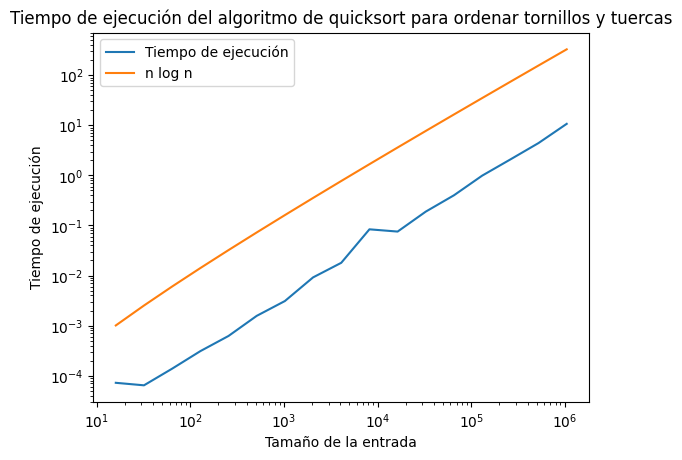

In [52]:
import matplotlib.pyplot as plt

n_log_n = [C * n * np.log2(n) for n in exp_sizes]
plt.plot(exp_sizes, exp_times, label="Tiempo de ejecución")
plt.plot(exp_sizes, n_log_n, label="n log n")
plt.xlabel("Tamaño de la entrada")
plt.ylabel("Tiempo de ejecución")
plt.title(
    "Tiempo de ejecución del algoritmo de quicksort para ordenar tornillos y tuercas"
)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()